# Review Analysis
Here we explore the review scores of current Airbnb rentals in Mallorca.<br />
Input data: Airbnb data of Mallorca acquired on Jun 28th 2020 (http://insideairbnb.com/get-the-data.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('listings.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# numerize price
listings.price.dtypes
price_in_num = []
for i in range(listings.shape[0]):
    price_in_num.append(int(listings.price[i][1:-3].replace(',','')))
listings.price = np.asarray(price_in_num)

In [16]:
# transform review scores into catagorical parameter review_grade
review_grade = np.asarray(listings.review_scores_rating>np.nanmean(listings.review_scores_rating))*1
review_grade[listings.review_scores_rating[listings.review_scores_rating.isna()].index]=-1
listings['review_grade']= review_grade
listings.review_grade = listings.review_grade.replace([1,0,-1],['Above average','Below average','No review'])

In [18]:
# percentage of no review
listings.review_grade.value_counts()[0]/listings.shape[0]

0.4125520188955123

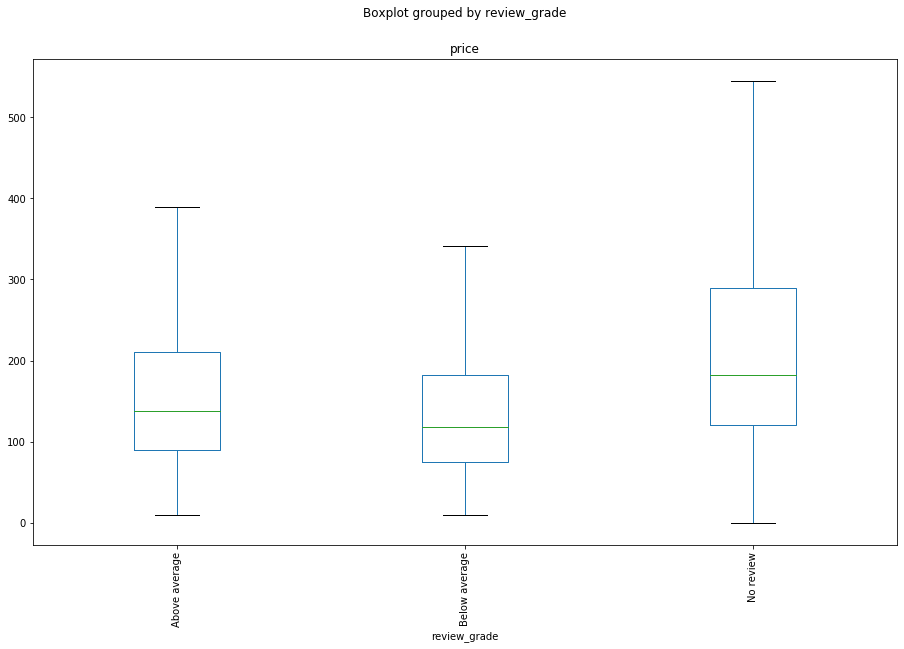

In [20]:
# visualize price distributin for properties with different review_grade
listings.boxplot(column=['price'],by='review_grade',grid=False, rot=90,figsize=(15,9),
                 showfliers=False)
